<a id='numpy'></a>
# NumPy

From the NumPy website, "NumPy is the fundamental package for scientific computing with Python. It contains among other things: a powerful N-dimensional array object." For the purposes of this course, we primarily use NumPy for its fast and fancy matrix functions. In general, Python list operations are slow; NumPy functions exploit the NumPy array object to "vectorize" the code, which usually improves the runtime of matrix calculations. **As a general rule of thumb, if a task involves vectors or matrices, you should resort to NumPy.** In addition to speeding up basic operations, NumPy contains an enormous library of matrix functions, so if you ever need to manipulate a vector or matrix, NumPy most likely already has a function implemented to suit your needs.

**Quintessential NumPy Documentation: http://docs.scipy.org/doc/numpy/reference/index.html**

**<span style="color:red">Run the cell below to import the packages needed to complete this lab.</span>**

In [2]:
import numpy as np # from now on, we can access numpy functions by referencing "np" instead of numpy
from numpy import linalg # import the linalg package, which inlcudes useful matrix operations

<a id='arrays'></a>
## Creating a NumPy array object

NumPy is centered around the `numpy.array()` class. This array object is extremely useful, however, it is often confused with built-in Python lists, particularly when trying to represent vectors. NumPy arrays and Python Lists are NOT synonymous; you **cannot** simply apply functions to NumPy arrays as if they were Python Lists.

In [3]:
# Example 9: Going from Python list to NumPy array

py_lst = [1,2,3,4]
np_arr = np.array(py_lst)
print('Python list:',py_lst)
print('NumPy array:',np_arr)

Python list: [1, 2, 3, 4]
NumPy array: [1 2 3 4]


In [4]:
# Example 10: Populating an empty NumPy array

np_arr = np.empty([4,4]) # An empty 4x4 numpy array

for i in range(4): #This outer loop runs with i taking values from 0 to 3.
    for j in range(4):
        np_arr[i,j] = i+j

print(np_arr)

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]
 [3. 4. 5. 6.]]


In [5]:
# Example 11: Creating a NumPy array of zeros and the Identity matrix

np_zeros = np.zeros([5,5]) # 5x5 NumPy array of all zeros
np_id = np.eye(5) # 5x5 Identity array

print('np_zeros:\n',np_zeros)
print('\nnp_id:\n',np_id)

np_zeros:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

np_id:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [19]:
# Example 12: Creating a NumPy array that spans a certain set/list of numbers

"""numpy.linspace() is useful when you know the number of divisions over a certain range you want, 
i.e., you want to divide the range [0-9] into 10 equal divisions.
"""
np_arr1 = np.linspace(0, 9, 10) # args for linspace(): (start, stop, num_divisions)
print('np_arr1:',np_arr1)


"""numpy.arange() is useful when you know how far away each division is from one another, a.k.a. the step size.
You want to start at 0 and get every number that is 1 away from the previous number until you get to 9.
"""
np_arr2 = np.arange(0, 10, 1) # args for arange(): (start, stop, step)
print('np_arr2:',np_arr2)

np_arr1: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
np_arr2: [0 1 2 3 4 5 6 7 8 9]


### NumPy array vs. Python List

Most arithmetic operations apply to NumPy arrays in element-wise fashion. This is in contrast with arithmetic operations for Python lists, which apply via concatenation.

In [20]:
# Example 13: NumPy array vs. Python list

lst = [1,2,3]
arr = np.eye(3)

lst2 = lst + lst
arr2 = arr + arr

print('lst:',lst)
print('lst + lst =',lst2)
print('\narr:\n',arr)
print('arr + arr =\n',arr2)

lst: [1, 2, 3]
lst + lst = [1, 2, 3, 1, 2, 3]

arr:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
arr + arr =
 [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


### NumPy array reshaping

Reshaping is useful when you want to do something such as turn a vector into a matrix or vice-versa. We want to be able to do this because it is often easier to construct the desired array as a vector then reshape the vector into a matrix.

In [25]:
# Example 17: Determining the shape of a NumPy array

test_arr = np.zeros([15,189])

print('Shape of test_arr:',test_arr.shape) # Notice .shape is a NumPy array property NOT a function, i.e. no parenthesis.
print('Number of elements in test_arr:',test_arr.size)

Shape of test_arr: (15, 189)
Number of elements in test_arr: 2835


In [27]:
# Example 18: Using reshape()

test_arr = np.array(range(16))
print('\ntest_arr:',test_arr)
print('Shape of test_arr:',test_arr.shape)

test_arr_4x4 = test_arr.reshape([4,4]) # Notice reshape() is called on the array object, i.e. array.reshape(dimensions) NOT np.reshape(arr, dimensions)!
print('\nReshaped test_arr:\n',test_arr_4x4)
print('Shape of test_arr_4x4:',test_arr_4x4.shape)

test_arr_vec = test_arr_4x4.reshape(test_arr_4x4.size) # Use array.flatten() instead. This is just to show array.reshape works in both directions.
print('\ntest_arr back as a vector:',test_arr_vec)
print('Shape of test_arr_vec:',test_arr_vec.shape)


test_arr: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Shape of test_arr: (16,)

Reshaped test_arr:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Shape of test_arr_4x4: (4, 4)

test_arr back as a vector: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Shape of test_arr_vec: (16,)


<a id='funcs'></a>
## Useful NumPy functions: (transpose(), linalg.inv(), dot(), concatenate(), vstack(), hstack(), max(), argmax())

**Quintessential NumPy Documentation: http://docs.scipy.org/doc/numpy/reference/index.html**

In [29]:
# Example 19: numpy.transpose()

norm = np.array(range(16)).reshape([4,4])
print('\nnorm:\n',norm)

norm_transpose = np.transpose(norm)
print('\nnorm_transpose:\n',norm_transpose)

print('\nnorm easy transpose:\n',norm.T) # numpy.transpose(arr) == arr.T


norm:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

norm_transpose:
 [[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]

norm easy transpose:
 [[ 0  4  8 12]
 [ 1  5  9 13]
 [ 2  6 10 14]
 [ 3  7 11 15]]


In [137]:
# Example 20: numpy.linalg.inv (finds the inverse of a matrix)

i = np.eye(4)
print('\ni:\n',i)

i_inv = np.linalg.inv(i) # Notice .inv() is a function in the linalg library of NumPy.
print('\ni_inv:\n',i_inv)
print('\nAs expected, i == inv(i).') 


i:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

i_inv:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

As expected, i == inv(i).


In [31]:
# Example 21a: numpy.dot() (how to do matrix multiplication in NumPy!)

a = np.array([[2,3],[4,5]])
print('\na:\n',a)
b = np.array([[1,2],[0,2]])
print('\nb:\n',b)

print('\nMatrix multiplication.')
c = np.dot(a,b)
print('a*b:\n',c)

print('\nOrder matters in numpy.dot()!')
d = np.dot(b,a)
print('b*a:\n',d)
print('Notice a*b != b*a.')

e = np.array([2,2])
print('\ne:',e)

print('\nnumpy.dot() can be used to multiply an array and vector too.')
f = np.dot(a,e)
print('a*e:',f)


a:
 [[2 3]
 [4 5]]

b:
 [[1 2]
 [0 2]]

Matrix multiplication.
a*b:
 [[ 2 10]
 [ 4 18]]

Order matters in numpy.dot()!
b*a:
 [[10 13]
 [ 8 10]]
Notice a*b != b*a.

e: [2 2]

numpy.dot() can be used to multiply an array and vector too.
a*e: [10 18]


**Instead of using `numpy.dot()` to perform matrix multiplication, NumPy provides an alternative using the `*` operator.** Up until now, we've been exclusively dealing with NumPy `arrays`; but there is another NumPy class called `matrix`. A NumPy `matrix` is just a 2-dimensional NumPy `array`, except it has a few additional features. In particular, we can use the `*` operator to perform multiplication of two NumPy `matrices` (we CANNOT use `*` when multiplying NumPy `arrays`).

In [32]:
# Example 21b: NumPy matrix multiplication
a = np.matrix([[2,3],[4,5]])
print('\na:\n',a)
b = np.matrix([[1,2],[0,2]])
print('\nb:\n',b)

print('\nMatrix multiplication using * operator.')
c = a*b
print('a*b:\n',c)


a:
 [[2 3]
 [4 5]]

b:
 [[1 2]
 [0 2]]

Matrix multiplication using * operator.
a*b:
 [[ 2 10]
 [ 4 18]]


In [138]:
# Example 22: numpy.concatenate() (how to append/attach multiple arrays.)

a = np.array([[2,3],[4,5]])
print('\na:\n',a)
b = np.array([[1,2],[0,2]])
print('\nb:\n',b)

c = np.concatenate([a,b], axis=0) # axis controls how to concatenate the arrays. axis=0 attach vertically, axis=1 attach horizontally.
print('\nAppend b to the "bottom" of a:\n',c)

d = np.concatenate([a,b], axis=1)
print('\nAppend b to the "right" of a:\n',d)


a:
 [[2 3]
 [4 5]]

b:
 [[1 2]
 [0 2]]

Append b to the "bottom" of a:
 [[1 2]
 [0 2]
 [2 3]
 [4 5]]

Append b to the "right" of a:
 [[2 3 1 2]
 [4 5 0 2]]


In [34]:
# Example 23: numpy.vstack() and numpy.hstack()

a = np.array([[2,3],[4,5]])
print('\na:\n',a)
b = np.array([[1,2],[0,2]])
print('\nb:\n',b)

c = np.vstack([a,b])
print('\nvstack a and b:\n',c)
print('Notice this is equivalent to concatenate with axis=0.')

d = np.hstack([a,b])
print('\nhstack a and b:\n',d)
print('Notice this is equivalent to concatenate with axis=1.')


a:
 [[2 3]
 [4 5]]

b:
 [[1 2]
 [0 2]]

vstack a and b:
 [[2 3]
 [4 5]
 [1 2]
 [0 2]]
Notice this is equivalent to concatenate with axis=0.

hstack a and b:
 [[2 3 1 2]
 [4 5 0 2]]
Notice this is equivalent to concatenate with axis=1.


<a id='misc'></a>
# Miscellaneous Functions

In [35]:
# Example 24: np.floor(), np.ceil()

a = 16.5
print('a:',a)
print('floor of a:',np.floor(a))
print('ceiling of a:',np.ceil(a))

a: 16.5
floor of a: 16.0
ceiling of a: 17.0


In [36]:
# Example 25: np.max(), np.min(), np.argmax(), np.argmin()

a = np.array([0,1,2,3,16,3,2,1,0])
print('a:',a)
print('max of a =',np.max(a))
print('min of a =',np.min(a))
print('index of max value of a =',np.argmax(a))
print('index of min value of a =',np.argmin(a))

a: [ 0  1  2  3 16  3  2  1  0]
max of a = 16
min of a = 0
index of max value of a = 4
index of min value of a = 0


## Curve Fitting
Curve fitting is the process of finding a mathematical function that best describes the relationship between a set of data points. The goal is to fit a curve that captures the underlying trend of the data while minimizing the difference (error) between the predicted values of the curve and the actual data points.

To achieve this, we define an equation (or function) that represents the expected relationship between the variables, then adjust the parameters of the function to minimize the error. The most common way to measure this error is by using the sum of squared differences (known as Least Squares Method) between the actual data points and the curve.`

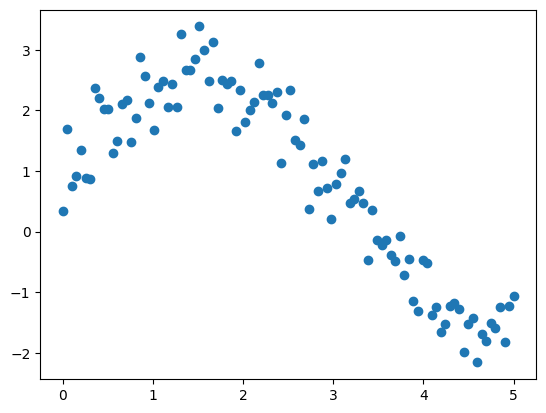

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import time

#Press Ctrl + / (Windows/Linux) to toggle commenting.

## Example1: Define a non-linear function
def func(x, a, b, c):
    return a * np.sin(x) + c

# # Example2: Define a polynomial function
# def func(x, a, b, c):
#     return  a * x**2 + b * x + c

# #  Example3: Define a exponential function
# def func(x, a, b, c):
#     return a * np.exp(b * x) + c

# #  Example4: Define a logarithmic function
# # def func(x, a, b, c):
# #     return a * np.log(b * x) + c

#  Example5: Define a Gaussian function
# def func(x, a, b, c):
#     return a * np.exp(-((x - b)**2) / (2 * c**2))

# # # Example6: Define a rational function
# def func(x, a, b, c):
#     return (a * x + b) / (c * x + 2)


# Generate synthetic data
x_data = np.linspace(0, 5, 100)
y_data = func(x_data, 2, 1.3, 0.5) + np.random.normal(0, 0.4, len(x_data))

# plot the synthetic data
plt.scatter(x_data, y_data, label='Data')
plt.show()

The purpose is to minimise the error function to reach to th eoptimal curve fitting. 

Optimized parameters: [2.07293149 1.         0.57459879]
Runtime for fitting: 0.013334274291992188 seconds
Final Mean Squared Error: 0.16529175342036548


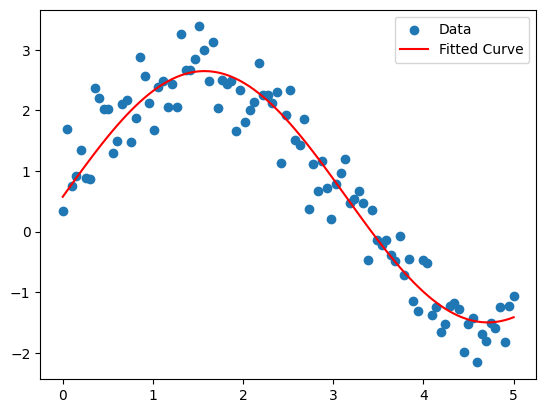

In [152]:
# Calculate mean squared error
def rmse_loss(params, x, y):
    a, b, c = params
    y_pred = func(x, a, b, c)
    return np.sqrt(np.mean((y - y_pred) ** 2))

# Initial guess for the parameters
initial_guess = [1, 1, 0]

# If you cannot fit the data, change the initial guess values and see the fitting results
#for example for gausian function we need to change the initial guess to:
#initial_guess = [2, 1, 1]


# Perform minimization
start_time = time.time()
result = minimize(rmse_loss, initial_guess, args=(x_data, y_data), options={'maxiter': 1000, 'gtol': 1e-6}) 
runtime = time.time() - start_time

# Optimized parameters from minimization
optimized_params = result.x
print(f"Optimized parameters: {optimized_params}")
print(f"Runtime for fitting: {runtime} seconds")

# Generate fitted curve using optimized parameters
y_fit = func(x_data, *optimized_params)

# Calculate and print the final MSE
final_mse = mse_loss(optimized_params, x_data, y_data)
print(f"Final Mean Squared Error: {final_mse}")

# Plot the data and fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, label='Fitted Curve', color='red')
plt.legend()
plt.show()




Plotting the residuals (the difference between the actual data and the predicted values) can help you understand where the model is not fitting well. This can give you insight into how to improve the model or the fitting process:

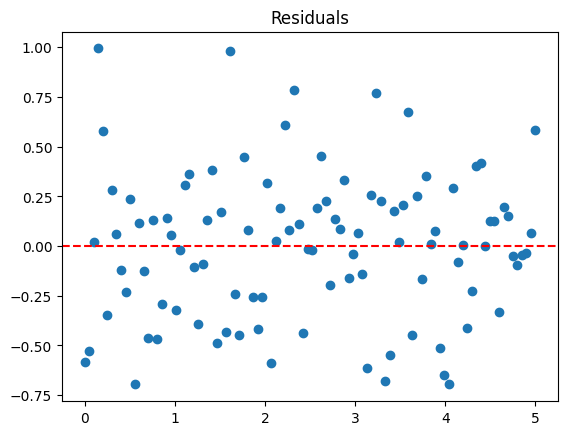

In [148]:
residuals = y_data - y_fit
plt.scatter(x_data, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.show()

## Diode Curve Fitting

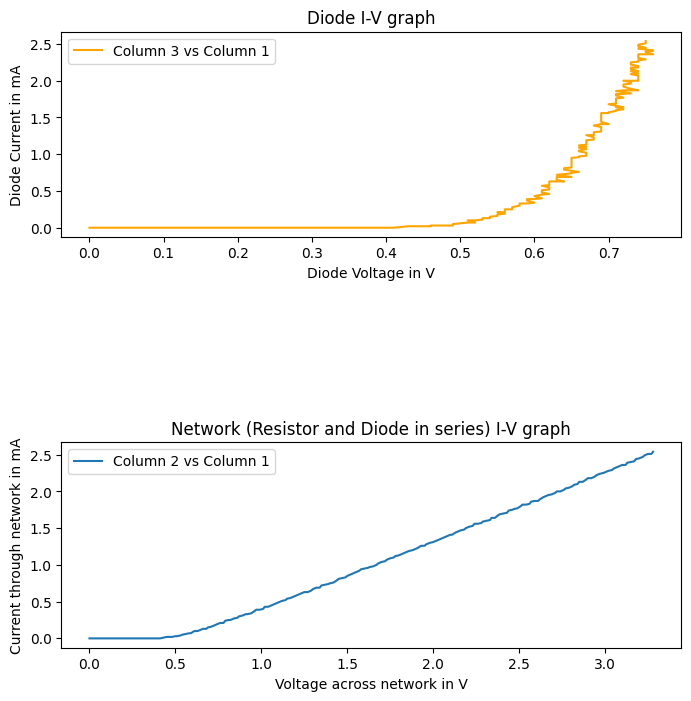

In [2]:
import matplotlib.pyplot as plt
import csv

read_data_from_csv = 1

# Initialize empty lists to store each column
resistor_voltage = []  # Current throught the resistor diode network in mA
dac_voltage = []
diode_voltage = []

if read_data_from_csv == 0:
    print("Type your command:")
    command = input("> ").strip()
    ser.write((command + '\n').encode())
    
    try:
        while True:
            # Read a line of data from the serial port
            if ser.in_waiting > 0:
                line = ser.readline().decode('utf-8').strip()
                
                # Check if the line contains "Ready to enter next command"
                if "Ready to enter next command" in line:
                    print("Received stop command.")
                    break
    
                # Split the line by commas
                values = line.split(',')
                # Check if we received exactly 3 values
                if len(values) == 3:
                    # Append each value to the respective list
                    resistor_voltage.append(float(values[0]))
                    dac_voltage.append(float(values[1]))
                    diode_voltage.append(float(values[2]))
    
                    #Print to verify (optional)
                    print(f"Col1: {values[0]}, Col2: {values[1]}, Col3: {values[2]}")
    
    except KeyboardInterrupt:
        print("Data collection interrupted.")

else:
    with open('diode_data.csv', mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            resistor_voltage.append(float(row[0])) 
            dac_voltage.append(float(row[1]))
            diode_voltage.append(float(row[2]))
    


plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)  # 
plt.plot(diode_voltage, resistor_voltage, label='Column 3 vs Column 1', color='orange')
plt.xlabel('Diode Voltage in V')
plt.ylabel('Diode Current in mA')
plt.title('Diode I-V graph')
plt.legend()

plt.subplot(2, 1, 2)  #
plt.plot(dac_voltage, resistor_voltage, label='Column 2 vs Column 1')
plt.xlabel('Voltage across network in V')
plt.ylabel('Current through network in mA')
plt.title('Network (Resistor and Diode in series) I-V graph')
plt.legend()



plt.subplots_adjust(hspace=1)


Iteration: I0 = 1.00e-09, n = 3.00, RMSE = 1.31e-03
Iteration: I0 = 1.50e-07, n = 3.00, RMSE = 3.41e-04
Iteration: I0 = 1.25e-07, n = 3.00, RMSE = 1.82e-04
Iteration: I0 = 1.22e-07, n = 3.00, RMSE = 1.80e-04

Final fitted parameters: I0 = 1.22e-07, n = 3.00


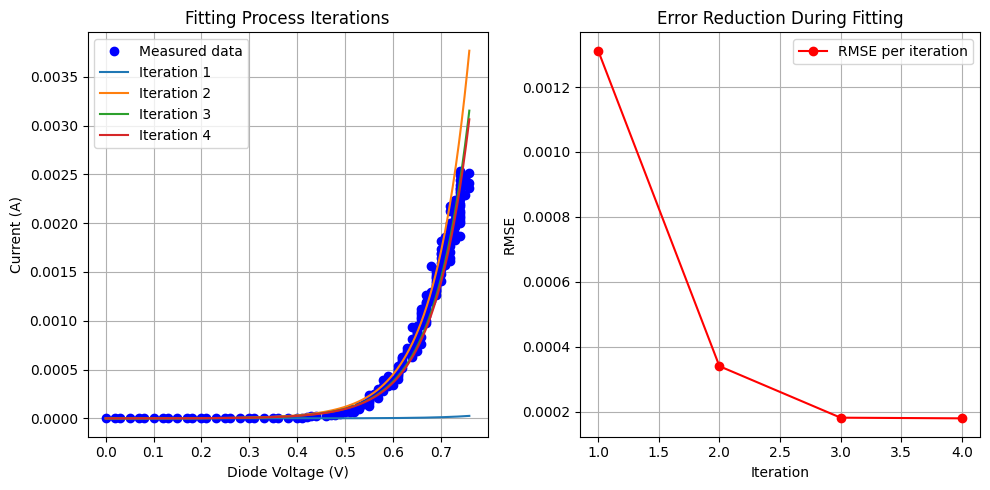

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
Vt = 0.025  # Thermal voltage at room temperature (in Volts)
R = 1000    # 1kΩ resistor

# Step 1: Define the diode equation
def diode_equation(V_diode, I0, n):
    """
    Diode equation: I = I0 * (exp(V_diode / (n * Vt)) - 1)
    V_diode: Diode voltage
    I0: Reverse saturation current (A)
    n: Ideality factor
    Vt: Thermal voltage
    """
    return I0 * (np.exp(V_diode / (n * Vt)) - 1)

# Step 2: Calculate the diode voltage considering the resistor
def calculate_diode_voltage(voltage_measured, current):
    """
    Calculate the voltage drop across the diode, taking into account the resistor.
    """
    voltage_measured = np.array(voltage_measured)
    current = np.array(current)
    current_in_amps = current * 1e-3  # Convert mA to A
    V_diode = voltage_measured - current_in_amps * R
    return V_diode

# Step 3: Define a cost function for optimization
def cost_function(params, V_diode, current):
    """
    The cost function that calculates the error between the model and the measured data.
    """
    I0, n = params
    current_in_amps = current * 1e-3  # Convert mA to A
    model_current = diode_equation(V_diode, I0, n)
    error = np.sqrt(np.mean((current_in_amps - model_current) ** 2))  # RMSE
    return error

# Step 4: Optimization with logging of iterations and RMSE
def fit_and_iterate(V_diode, current, initial_guess):
    """
    Optimize the diode equation and log the parameters and RMSE at each iteration.
    """
    # Lists to capture the parameters and RMSE during optimization
    iteration_log = []
    error_log = []
    
    def callback(params):
        # Capture the current parameters and iteration
        iteration_log.append(params)
        current_rmse = cost_function(params, V_diode, current)
        error_log.append(current_rmse)
        print(f"Iteration: I0 = {params[0]:.2e}, n = {params[1]:.2f}, RMSE = {current_rmse:.2e}")

    # Perform the optimization using 'minimize' with L-BFGS-B method
    result = minimize(
        cost_function, initial_guess, args=(V_diode, current),
        method='L-BFGS-B', bounds=[(1e-9, 1e-1), (1, 3)],
        #callback=callback, options={'maxiter': 1000}
        callback=callback,
        options={'maxiter': 1000, 'ftol': 1e-12, 'gtol': 1e-12}  # Smaller tolerances
    )
    
    # Return the final result, the logged parameters, and the RMSE from iterations
    return result.x, iteration_log, error_log

# Step 5: Plot the fitting process and error reduction
def plot_fitting_process(V_diode, current, params_log, error_log):
    """
    Plot the measured data, the final fitted curve, and intermediate fits, along with the error.
    """
    current_in_amps = current * 1e-3  # Convert mA to A for plotting
    
    # Plot measured data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(V_diode, current_in_amps, 'bo', label='Measured data')
    
    # Generate smooth V_diode values for plotting fitted curves
    V_diode_smooth = np.linspace(min(V_diode), max(V_diode), 1000)
    
    # Plot the fitting process by showing intermediate curves
    for i, params in enumerate(params_log):
        I0, n = params
        model_current = diode_equation(V_diode_smooth, I0, n)
        plt.plot(V_diode_smooth, model_current, label=f'Iteration {i+1}')
    
    plt.xlabel('Diode Voltage (V)')
    plt.ylabel('Current (A)')
    plt.title('Fitting Process Iterations')
    plt.legend()
    plt.grid(True)

    # Plot the error reduction over iterations
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(error_log) + 1), error_log, 'r-o', label='RMSE per iteration')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.title('Error Reduction During Fitting')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Step 6: Run the fitting and visualize the iterations and error
def visualize_fitting_process(V_diode, current, initial_guess):
    """
    Run the fitting process and visualize how the parameters evolve and how the error decreases.
    """
    # Run the fitting process with the initial guess
    final_params, params_log, error_log = fit_and_iterate(V_diode, current, initial_guess)
    
    print(f"\nFinal fitted parameters: I0 = {final_params[0]:.2e}, n = {final_params[1]:.2f}")
    
    # Plot the measured data, fitting process, and error reduction
    plot_fitting_process(V_diode, current, params_log, error_log)

# Example process to show fitting
voltage = np.array(dac_voltage)  # Example input data for measured voltage
current = np.array(resistor_voltage)  # Example input data for measured current

# Step 1: Calculate the diode voltage
V_diode_trimmed = calculate_diode_voltage(voltage, current)

# Step 2: Visualize the fitting process with an initial guess
initial_guess = [1e-8, 1]  # Initial guess for I0 and n
visualize_fitting_process(V_diode_trimmed, current, initial_guess)